# Лабораторная работа 7

## Цифровой демодулятор фазоманипулированных сигналов

## Задачи и порядок выполнения работы

1. Получить массив отсчётов исходного фазоманипулированного сигнала с длительностью чипа 𝜏, несущей частотой 50 Гц, кодирующего последовательность 𝐴 = 𝑎0,𝑎1,...,𝑎𝑁 значениями фаз 𝜑0 = 0, 𝜑1 = 𝜋.
2. Построить графики звукового сигнала во временной и частотной области.
3. Провести декодирование последовательности.
4. Сравнить полученную последовательность с исходной.

#### 1. Получить массив отсчётов исходного фазоманипулированного сигнала с длительностью чипа 𝜏, несущей частотой 50 Гц, кодирующего последовательность 𝐴 = 𝑎0,𝑎1,...,𝑎𝑁 значениями фаз 𝜑0 = 0, 𝜑1 = 𝜋.

In [1]:
import numpy as np

sampling_rate = 8000
carrier_freq = 50
data_step = int(sampling_rate / carrier_freq)

message = 'Hello World!'
charcodes = list(bytes(message, encoding='utf8'))
data = np.unpackbits(np.array(charcodes, dtype='uint8'))
data_len = len(data) * data_step

print(f'''\
Сообщение: {message};
Коды символов: {charcodes};
В двоичном представлении: {data};
Всего точек: {data_len};
''')

Сообщение: Hello World!;
Коды символов: [72, 101, 108, 108, 111, 32, 87, 111, 114, 108, 100, 33];
В двоичном представлении: [0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1];
Всего точек: 15360;



##### Генерируем смещения фаз по данным из сообщения

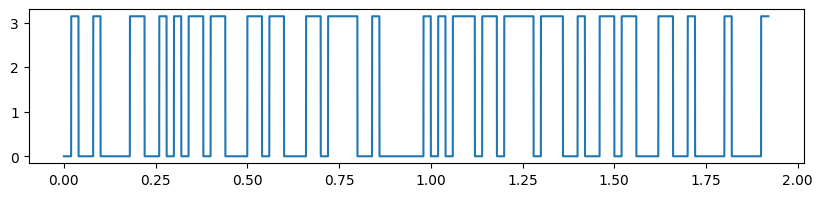

In [2]:
import matplotlib.pyplot as plt

time = np.arange(data_len) / sampling_rate
phase_shifts = np.repeat(data, data_step) * np.pi

plt.figure(figsize=(10, 2))
plt.plot(time, phase_shifts)

##### Генерируем несущую частоту со смещением

Text(0.5, 0, 'Время, с')

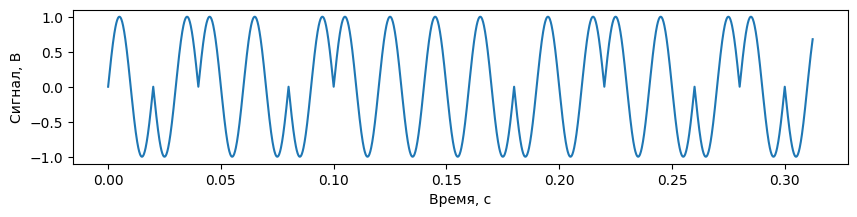

In [3]:
signal = np.sin(2 * np.pi * carrier_freq * time + phase_shifts)

plt.figure(figsize=(10, 2))
plt.plot(time[:2500], signal[:2500])
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

In [4]:
from soundfile import write
from IPython.display import Audio

write('signal.wav', signal, samplerate=sampling_rate)

Audio('signal.wav') # Как звучит!

#### 2. Построить графики звукового сигнала во временной и частотной области.

Text(0.5, 0, 'Время, с')

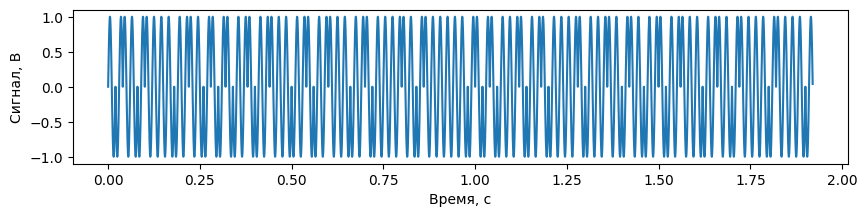

In [5]:
plt.figure(figsize=(10, 2))
plt.plot(time, signal)
plt.ylabel('Сигнал, В')
plt.xlabel('Время, с')

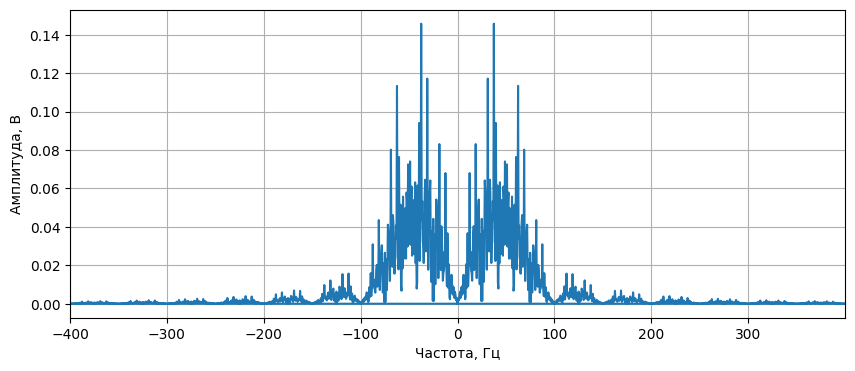

In [6]:
from scipy.fft import fft, fftfreq

def freq_plot(data: np.ndarray):
    sp = fft(data)
    length = len(data)
    freq = fftfreq(length, 1 / sampling_rate)
    plt.figure(figsize=(10, 4))
    plt.plot(freq, np.abs(sp / length))
    plt.xlim(-400.0, 400.0)
    plt.xticks(np.arange(-400.0, 400.0, 100.0))
    plt.grid()
    plt.xlabel('Частота, Гц')
    plt.ylabel('Амплитуда, В')

freq_plot(signal)

#### 3. Провести декодирование последовательности.

Text(0.5, 0, 'Время, с')

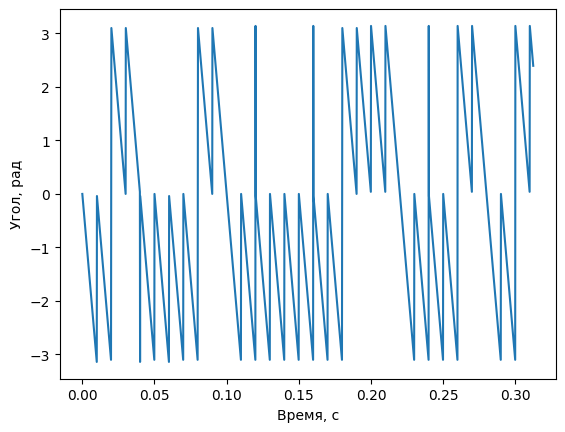

In [7]:
carrier_wave_q = np.sin(2 * np.pi * carrier_freq * time + np.pi)
'Квадратурная(мнимая) часть'
carrier_wave_i = np.cos(2 * np.pi * carrier_freq * time)
'Синфазная(действительная) часть'

carrier_wave = carrier_wave_i + carrier_wave_q * 1j

result = np.angle(carrier_wave * signal)
plt.plot(time[:2500], result[:2500])
plt.ylabel('Угол, рад')
plt.xlabel('Время, с')

In [8]:
message_len = int(len(result) / data_step)
message_fragments = np.split(result, np.arange(1, message_len) * data_step)

decoded = np.rint(np.mean(message_fragments, axis=1) / np.pi + 0.5).astype(int)
print(decoded)

[0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [9]:
decoded_bytes = bytes(np.packbits(decoded))

decoded_message = decoded_bytes.decode('utf-8')

print(decoded_message)

Hello World!


#### 4. Сравнить полученную последовательность с исходной.

In [10]:
assert message == decoded_message

Полученная последовательность, - "Hello World!", - равна исходной

## Контрольные вопросы

#### 1. Какие бывают виды модуляции (манипуляции) сигнала?

Видов манипуляции сигналов бывает очень много. Мы рассматривали фазовую манипуляцию, которая бывает, например, двоичной (BPSK), квадратурной (QPSK), восьмеричной (8-PSK).

#### 2. Какие преимущества и недостатки сопутствуют увеличению количеству градаций фаз при фазоманипулированном кодировании сигнала в цифровой передаче данных?

Преимущества:
- Емкость закодированной информации и теоретическая скорость передачи данных возрастают.

Недостатки:
- Сложнее различать значения фаз

#### 3. Каким образом можно вычислить фазу отсчета комплексного сигнала?

Фазу отсчета комплексного сигнала можно вычислить с помощью арктангенса:

$$ \phi = \arctan [\frac Q I] $$

#### 4. Чем определяется скорость беспроводной цифровой передачи информации при использовании фазоманипулированного кодирования?

Количеством фаз, несущей частотой

#### 5. Отличаются ли спектры гармонического сигнала и фазоманипулированного сигнала при использовании одной и той же несущей частоты?

Да, фазовая манипуляция приводит к появлению дополнительных частотных компонент, обусловленных изменением фазы, что расширяет спектр